In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("customer.csv") 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
cdf = df[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

In [5]:
from sklearn.preprocessing import LabelEncoder
cdf['Gender_ENcoder'] = LabelEncoder().fit_transform(cdf['Gender'])

In [6]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Gender_ENcoder          200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [7]:
cdf = cdf.drop('Gender',axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler
cdf_scaled = StandardScaler().fit_transform(cdf)


In [10]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(cdf_scaled)
print(set(labels))


{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(-1)}


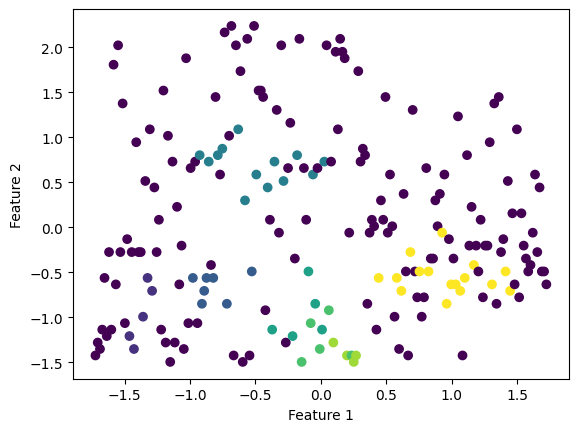

In [12]:
import matplotlib.pyplot as plt

plt.scatter(cdf_scaled[:,0], cdf_scaled[:,1], c=labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
